In [30]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("Advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [31]:
X = data[['TV', 'radio', 'newspaper']]
Y = data['sales']

Y = np.array((Y - Y.mean())/Y.std())
X = X.apply(lambda rec: (rec - rec.mean())/rec.std(), axis=0)

In [32]:
import random

def initialize(dim):
  np.random.seed(seed=42)
  random.seed(42)

  b = random.random()
  w = np.random.rand(dim)

  return b, w

### **Method 1: Random Initialization of the Bias and Weights**

In [33]:
b, w = initialize(3)
print("Bias:", b, "Weight:", w)

Bias: 0.6394267984578837 Weight: [0.37454012 0.95071431 0.73199394]


### **Method 2: Predict Y Values from the Bias and Weights**

In [34]:
# Inputs:
# b - bias
# w - weights
# X - the input matrix

def predic_Y(b, w, X):
  return b + np.matmul(X, w)

b, w = initialize(3)
y_hat = predic_Y(b, w, X)
y_hat[:10]

,0
0,3.231496
1,1.707849
2,2.824761
3,2.753090
4,0.924486
5,3.171365
6,0.622344
7,-0.349354
8,-2.313095
9,-0.768030


### **Method 3: Calculate the Cost Function — MSE**

In [35]:
import math

# Inputs
# Y - Actual values of y
# Y_hat - predicted value of y
def get_cost(Y, y_hat):
  # Calculating the residuals - difference between actual and
  # predicted values
  Y_resid = Y - y_hat
  # Matrix multiplication with self will give the square values
  # Then take the sum and divide by number of examples to
  # calculate mean
  return np.sum(np.matmul(Y_resid.T, Y_resid))/ len(Y_resid)

b, w = initialize(3)
y_hat = predic_Y(b, w, X)
get_cost(Y, y_hat)

np.float64(1.5303100198505897)

### **Method 4: Update the Bias and Weights**

In [36]:
#The parameters passed to the function are:
  #1. x, y: the input and output variables
  #2. y_hat: predicted value with current bias and weights
  #3. b_0, w_0: current bias and weights
  #4. learning rate: learning rate to adjust the update step

def update_beta(x, y, y_hat, b_0, w_0, learning_rate):
  # gradient of bias
  db = np.sum((y_hat - y) * 2 / len(y))
  #  gradient of weights
  dw = (np.dot((y_hat - y), x) * 2) / len(y)
  # update bias
  b_1 = b_0 - learning_rate * db
  # update beta
  w_1 = w_0 - learning_rate * dw

  return b_1, w_1

b, w = initialize(3)
print("After initialization - Bias: ", b, "Weights: ",w)
y_hat = predic_Y(b, w, X  )
b, w = update_beta(X, Y, y_hat, b, w, 0.01)
print("After updating - Bias: ", b, "Weights: ", w)

After initialization - Bias:  0.6394267984578837 Weights:  [0.37454012 0.95071431 0.73199394]
After updating - Bias:  0.6266382624887261 Weights:  [0.38079093 0.9376953  0.71484883]


### **Finding the Optimal Bias and Weights**

In [37]:
def run_gradient_descent(X, Y, alpha=0.01, num_iterations=100):
    # 1️⃣ Bias va Weight’larni boshlang‘ich qiymat bilan o‘rnatamiz
    b, w = initialize(X.shape[1])
    iter_num = 0

    # 2️⃣ Har 10 qadamda cost (xatolik)ni saqlash uchun DataFrame
    gd_iterations_df = pd.DataFrame(columns=['iteration', 'cost'])
    result_idx = 0

    # 3️⃣ Iteratsiyalarni bajarish
    for each_iter in range(num_iterations):

        # a. Yangi Y_hat hisoblash (bashorat)
        Y_hat = predic_Y(b, w, X)

        # b. Hozirgi cost (MSE)ni hisoblash
        this_cost = get_cost(Y, Y_hat)

        # c. Oldingi qiymatlarni saqlab olish
        prev_b = b
        prev_w = w

        # d. Bias va Weight’larni yangilash
        b, w = update_beta(X, Y, Y_hat, prev_b, prev_w, alpha)

        # e. Har 10 iteratsiyada costni yozib borish
        if (iter_num % 10 == 0):
            gd_iterations_df.loc[result_idx] = [iter_num, this_cost]
            result_idx += 1

        iter_num += 1

    # 4️⃣ Natijani chiqarish
    print("Final estimate of b and w:", b, w)

    # 5️⃣ Natijani qaytarish
    return gd_iterations_df, b, w
gd_iterations_df, b, w = run_gradient_descent(X, Y, alpha=0.001, num_iterations=200)


Final estimate of b and w: 0.4284489581739146 [0.48270238 0.75265969 0.46109174]


In [38]:
gd_iterations_df[:10]

,iteration,cost
0,0.0,1.530310
1,10.0,1.465201
2,20.0,1.403145
3,30.0,1.343996
4,40.0,1.287615
5,50.0,1.233868
6,60.0,1.182630
7,70.0,1.133780
8,80.0,1.087203
9,90.0,1.042793


### **Plotting the Cost Function against the Iterations**

Text(0, 0.5, 'Cost or MSE')

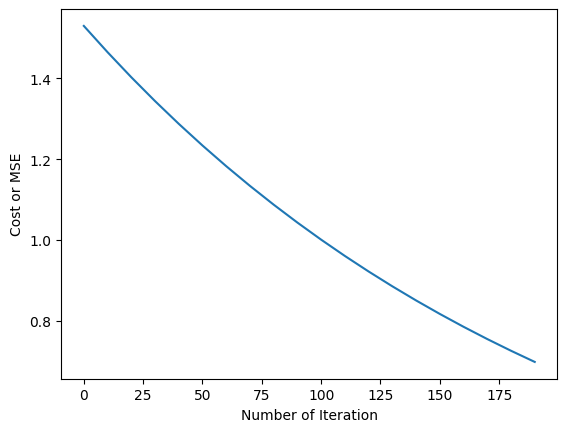

In [39]:
from ast import increment_lineno
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

plt.plot(gd_iterations_df['iteration'], gd_iterations_df['cost'])
plt.xlabel("Number of Iteration")
plt.ylabel("Cost or MSE")

In [40]:
alpha_df_1, b, w = run_gradient_descent(X, Y, alpha=0.01, num_iterations=2000)

Final estimate of b and w: -5.572073188002259e-17 [ 0.75306591  0.53648155 -0.00433069]


In [41]:
alpha_df_2, b, w = run_gradient_descent(X, Y, alpha=0.001, num_iterations=2000)

Final estimate of b and w: 0.011664695556930211 [0.74315125 0.52779959 0.01171703]


Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

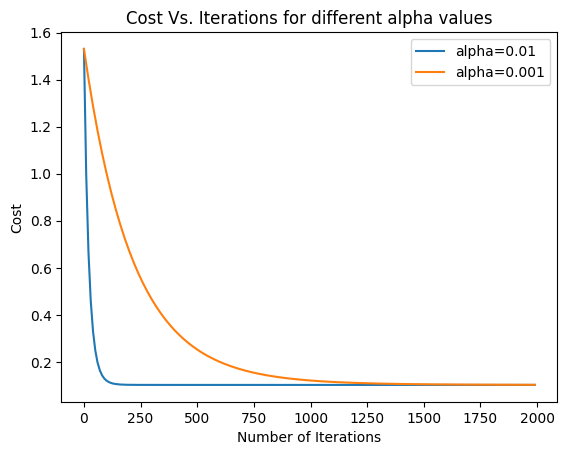

In [42]:
plt.plot(alpha_df_1['iteration'], alpha_df_1['cost'], label="alpha=0.01")
plt.plot(alpha_df_2['iteration'], alpha_df_2['cost'], label="alpha=0.001")
plt.legend()
plt.ylabel("Cost")
plt.xlabel("Number of Iterations")
plt.title("Cost Vs. Iterations for different alpha values")